In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import train_test_split
from time import time
import numpy as np
from matplotlib import pyplot as plt

In [20]:

def create_model():
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

def train_model(optimizer_name, lr=0.01, X_train=None, y_train=None, X_val=None, y_val=None, epochs=50):
  start_time = time()
  batch_size = 1
  model = create_model()
  if optimizer_name == "SGD":
    optimizer = SGD(lr=lr, weight_decay=0, momentum=0.0)
    batch_size = X_train.shape[0]
  elif optimizer_name == "Mini-batch SGD":
    optimizer = SGD(lr=lr, weight_decay=0, momentum=0.0)
    batch_size = 64
  elif optimizer_name == "Batch SGD":
    optimizer = SGD(lr=lr, weight_decay=0, momentum=0.0)
    batch_size = 1
  elif optimizer_name == "Mini-batch SGD with Decay":
    optimizer = SGD(lr=lr, weight_decay=1e-6, momentum=0.0)
  elif optimizer_name == "Mini-batch SGD with Decay and Momentum":
    optimizer = SGD(lr=lr, weight_decay=1e-6, momentum=0.9)
  elif optimizer_name == "Adam":
    optimizer = Adam(lr=lr)
  elif optimizer_name == "RMSprop":
    optimizer = RMSprop(lr=lr)
  else:
    raise ValueError(f"Invalid optimizer name: {optimizer_name}")
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=5)
  print(batch_size)
  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping], batch_size=batch_size)
  end_time = time()
  training_time = end_time - start_time

  # Track best model based on validation accuracy
  best_model = model
  best_val_acc = max(history.history['val_accuracy'])
  for i in range(len(history.history['val_accuracy'])):
    if history.history['val_accuracy'][i] == best_val_acc:
      best_model = model.get_weights()
      break

  # Plot learning curves
  plt.plot(history.history['loss'], label=f'Training Loss ({optimizer_name})')
  plt.plot(history.history['val_loss'], label=f'Validation Loss ({optimizer_name})')
  plt.plot(history.history['accuracy'], label=f'Training Accuracy ({optimizer_name})')
  plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({optimizer_name})')
  plt.title(f'Learning Curves ({optimizer_name})')
  plt.xlabel('Epoch')
  plt.ylabel('Loss/Accuracy')
  plt.legend()
  plt.show()

  return history, training_time, best_model

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)


SGD
48000
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 2.4527 - accuracy: 0.0957 - val_loss: 2.4447 - val_accuracy: 0.0983
Epoch 2/50
1/1 [==============================] - 0s 155ms/step - loss: 2.4432 - accuracy: 0.0973 - val_loss: 2.4355 - val_accuracy: 0.0998
Epoch 3/50
1/1 [==============================] - 0s 127ms/step - loss: 2.4340 - accuracy: 0.0989 - val_loss: 2.4267 - val_accuracy: 0.1005
Epoch 4/50
1/1 [==============================] - 0s 138ms/step - loss: 2.4250 - accuracy: 0.1005 - val_loss: 2.4180 - val_accuracy: 0.1022
Epoch 5/50
1/1 [==============================] - 0s 147ms/step - loss: 2.4162 - accuracy: 0.1023 - val_loss: 2.4095 - val_accuracy: 0.1045
Epoch 6/50
1/1 [==============================] - 0s 147ms/step - loss: 2.4077 - accuracy: 0.1047 - val_loss: 2.4013 - val_accuracy: 0.1066
Epoch 7/50
1/1 [==============================] - 0s 173ms/step - loss: 2.3994 - accuracy: 0.1065 - val_loss: 2.3932 - val_accuracy: 0.1077
Epoch 8/50
1/

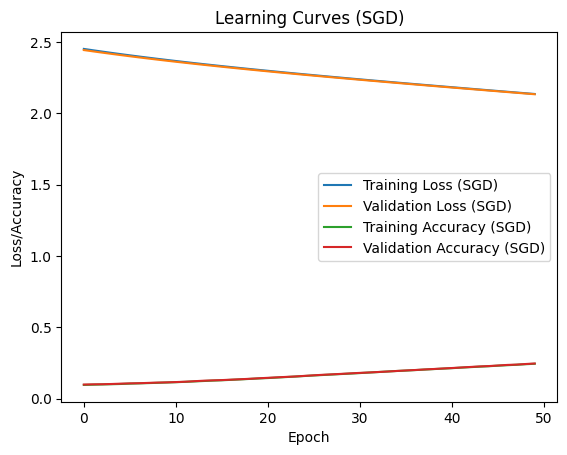

Mini-batch SGD
64
Epoch 1/50
750/750 [==============================] - 2s 3ms/step - loss: 0.9902 - accuracy: 0.7546 - val_loss: 0.4684 - val_accuracy: 0.8746
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.3987 - accuracy: 0.8894 - val_loss: 0.3484 - val_accuracy: 0.9005
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.3297 - accuracy: 0.9066 - val_loss: 0.3051 - val_accuracy: 0.9115
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2938 - accuracy: 0.9161 - val_loss: 0.2813 - val_accuracy: 0.9167
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2693 - accuracy: 0.9228 - val_loss: 0.2616 - val_accuracy: 0.9237
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2486 - accuracy: 0.9287 - val_loss: 0.2456 - val_accuracy: 0.9269
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2320 - accuracy: 0.9332 - val_loss: 0.2287 - val_accur

In [21]:
# Split train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2)

# Train models with different optimizers
optimizers = ["SGD", "Mini-batch SGD", "Batch SGD", "Mini-batch SGD with Decay", "Mini-batch SGD with Decay and Momentum", "Adam", "RMSprop"]
training_times = {}
best_models = {}
for optimizer in optimizers:
  print(optimizer)
  history, training_time, best_model = train_model(optimizer, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
  training_times[optimizer] = training_time
  best_models[optimizer] = best_model

# Print training times
print("Training Time Comparison:")
for optimizer, time in training_times.items():
  print(f"{optimizer}: {time:.2f} seconds")

# Select the best model based on validation accuracy (replace with your choice)
# Assuming SGD with Decay and Momentum performed best
best_model_weights = best_models["SGD with Decay and Momentum"]

# Save the best model (weights only)
model = create_model()
model.set_weights(best_model_weights)
model.save("best_model.h5")

# Define a function to load the model (optional, for reusability)
def load_model(filepath):
  model = create_model()
  model.load_weights(filepath)
  return model

# Load the exported model
loaded_model = load_model("best_model.h5")

# Prepare some test set samples for prediction
test_sample1 = test_images[0]  # Select a sample from the test set
test_sample2 = test_images[1]  # Select another sample for prediction

# Make predictions on the test samples
predictions1 = loaded_model.predict(np.array([test_sample1]))  # Reshape for single sample prediction
predictions2 = loaded_model.predict(np.array([test_sample2]))

# Print the predicted class labels (assuming predictions have probabilities)
predicted_class1 = np.argmax(predictions1[0])
predicted_class2 = np.argmax(predictions2[0])
print(f"Predicted Class for Sample 1: {predicted_class1}")
print(f"Predicted Class for Sample 2: {predicted_class2}")
